Basic plotting in R - histograms, boxplots, scatterplots
========================================================

**Author:** Marcus Birkenkrahe




# Table of Contents







## Histograms



-   [ ] When do you think of using **barplots**?

>   Barplots are sensible for counting **observations of categories**- [ ] When do you think of using a **histogram**?
>   When you have observed a single **numeric-continuous variable**- *Example:* You've already seen the histogram for a simple data
  structure, the **time series** `ts` (here next to the **line plot**):



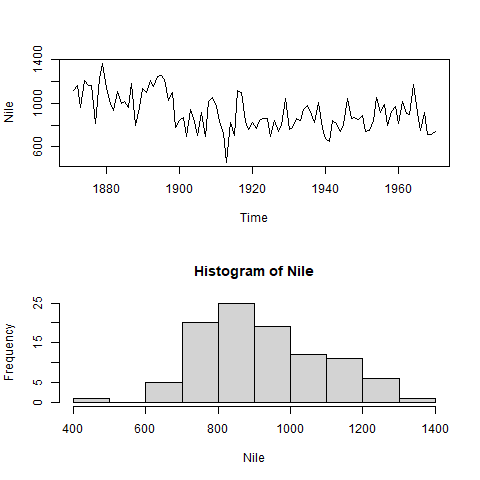

In [1]:
par(mfrow=c(2,1)) # create 2 x 1 plot array
plot(Nile)
hist(Nile)

-   [ ] What does the *height* of a bar represent exactly?

>   The height of each bar (on the y-axis) represents the number of
>   years in which the volume of water flowing through the Nile was
>   within its interval of 100 mio cubic metres width (on the x-axis).

-   [ ] How can you find out what the *binwidth* of this histogram is?



In [1]:
str(hist(Nile))

: List of 6
  :  $ breaks  : int [1:11] 400 500 600 700 800 900 1000 1100 1200 1300 ...
  :  $ counts  : int [1:10] 1 0 5 20 25 19 12 11 6 1
  :  $ density : num [1:10] 0.0001 0 0.0005 0.002 0.0025 0.0019 0.0012 0.0011 0.0006 0.0001
  :  $ mids    : num [1:10] 450 550 650 750 850 950 1050 1150 1250 1350
  :  $ xname   : chr "Nile"
  :  $ equidist: logi TRUE
  :  - attr(*, "class")= chr "histogram"

-   [ ] Look at the `help` for `hist`, then change the binwidth to `30`.



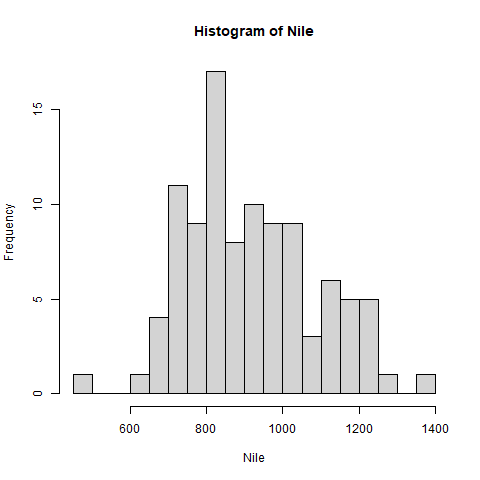

In [1]:
hist(Nile, breaks=30)

-   [ ] How can you **print** the value for the binwidth (`breaks`)?



In [1]:
h <- hist(Nile)
h$breaks[2]-h$breaks[1]

: [1] 100

-   [ ] What happens when you choose `breaks=0`?



In [1]:
hist(Nile, breaks=0)

: Error in hist.default(Nile, breaks = 0) : invalid number of 'breaks'

-   [ ] What happens when you set `breaks=1000001` (`1e+6 + 1`)?



In [1]:
hist(Nile, breaks=1000001)

: Warning message:
  : In hist.default(Nile, breaks = 1000001) :
  :   'breaks = 1e+06' is too large and set to 1e6

-   [ ] Create a script file `Nile.R`, put the previous command into it,
    and run it as a batch process in the shell (using `M-x eshell`):
    
        $ R CMD BATCH Nile.R
    
    Open the output file `Nile.rout` to see the result:
    
        > hist(Nile, breaks=1000001)
        Warning message:
        In hist.default(Nile, breaks = 1000001) :
        'breaks = 1e+06' is too large and set to 1e6
        >
        > proc.time()
          user  system elapsed
          1.09    0.09    1.20

-   `proc.time` and `system.time` measure the performance of R. Example:
    measure rolling 1 die a million times:



In [1]:
system.time(
  for (i in 1:1e6)
    sample(1:6,1))

## Histogram analysis



-   You can manually set the histogram `breaks` by supplying a vector

-   Example: horsepower `hp` in the `mtcars` dataset with `breaks` from `0` to
    `400`, `25` units apart from each other:



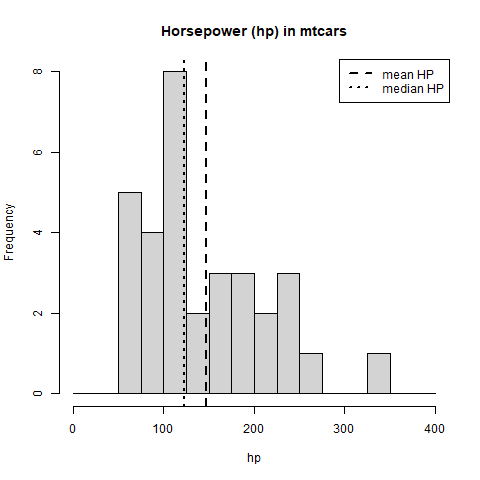

In [1]:
hp <- mtcars$hp
hist(x=hp,
     breaks=seq(from=0, to=400, by=25),
     main="Horsepower (hp) in mtcars")  # histogram
abline(v=c(mean(hp),median(hp)),
       lty=c(2,3),lwd=2) # mean, median
legend("topright",
       legend=c("mean HP","median HP"),
       lty=c(2,3),lwd=2) # legend

-   Reducing the bin width allows seeing more detail but also risks
    highlighting irrelevant features (like the single outlying car).



In [1]:
max(hp) # outlier in mtcars$hp

: [1] 335

-   Too small a binwidth leads to too much detail
    -   Too large a binwidth leads to loss of detail



## Histograms in ggplot2



-   Histogram of `mtcars$hp` in ggplot2:



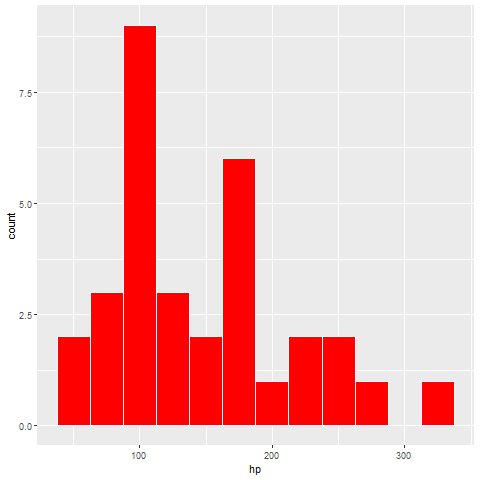

In [1]:
library(ggplot2)
ggplot(data=mtcars,
       aes(x=hp)) +
  geom_histogram(binwidth=25, color="white", fill="red")

-   A histogram of `Nile` is not so easy because it's a time series:



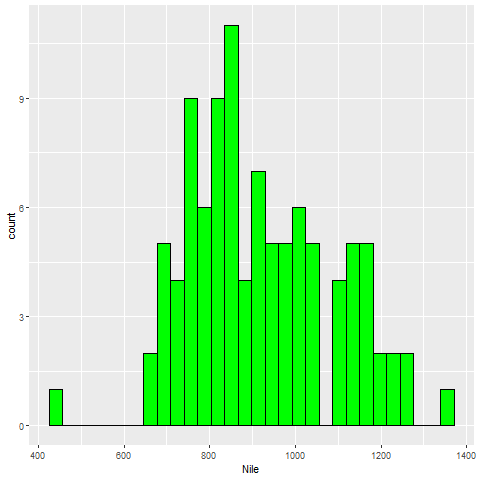

In [1]:
library(ggplot2)
ggplot(data=data.frame(Nile),
       aes(x=Nile)) +
  geom_histogram(color="black", fill="green")

## Practice creating and customizing a histogram



![img](../img/penguins.jpg)

-   Download and open in GNU Emacs: [tinyurl.com/nhkykkxr](https://tinyurl.com/nhkykkxr)

-   Work with a friend or with your neighbor in class

-   Complete the problems in the file (we'll discuss at the end)

-   Upload the result (for each participants) [to Canvas (Practice 10)](https://lyon.instructure.com/courses/568/assignments/3755)



## Boxplots - global summary stats



-   Open the practice file in Emacs to code along: [tinyurl.com/2e6dy9yb](https://tinyurl.com/2e6dy9yb)

-   Box-and-whisker plots, or boxplots represent the five-number
    `summary`:
    1.  Minimum
    2.  1st quartile (25% of the values are below it)
    3.  Median (50% of the values are below/above it)
    4.  Mean (Arithmetic average)
    5.  3rd quartile (75% of the values are below it)
    6.  Maximum

-   For example for `x <- c(1,2,3,4,5,6,7,8,9,10)`:



In [1]:
x <- c(1:10
summary(x)

:    Min. 1st Qu.  Median    Mean 3rd Qu.    Max.
  :    1.00    3.25    5.50    5.50    7.75   10.00

-   For the built-in `quakes` data frame of 1,000 seismic events near the
    island of Fiji (depth, magnitude, number of observing stations):



In [1]:
summary(quakes[,c("depth","mag","stations")])

:      depth            mag          stations
  :  Min.   : 40.0   Min.   :4.00   Min.   : 10.00
  :  1st Qu.: 99.0   1st Qu.:4.30   1st Qu.: 18.00
  :  Median :247.0   Median :4.60   Median : 27.00
  :  Mean   :311.4   Mean   :4.62   Mean   : 33.42
  :  3rd Qu.:543.0   3rd Qu.:4.90   3rd Qu.: 42.00
  :  Max.   :680.0   Max.   :6.40   Max.   :132.00

-   Each record/row represents one recorded earthquake: where it was
    located, at which depth the epicenter was, its magnitude, and the
    number or observing stations:



In [1]:
head(quakes)

:      lat   long depth mag stations
  : 1 -20.42 181.62   562 4.8       41
  : 2 -20.62 181.03   650 4.2       15
  : 3 -26.00 184.10    42 5.4       43
  : 4 -17.97 181.66   626 4.1       19
  : 5 -20.42 181.96   649 4.0       11
  : 6 -19.68 184.31   195 4.0       12

-   The boxplot of the earthquake magnitudes shows the output of `summary`
    except the `mean`, but it also shows *outliers*, extreme values that
    distort the mean:
    
    ![img](../img/9_boxplot_explained.png)

-   Creating a boxplot is simple: for the earthquake magnitudes
    (`quakes$mag`):



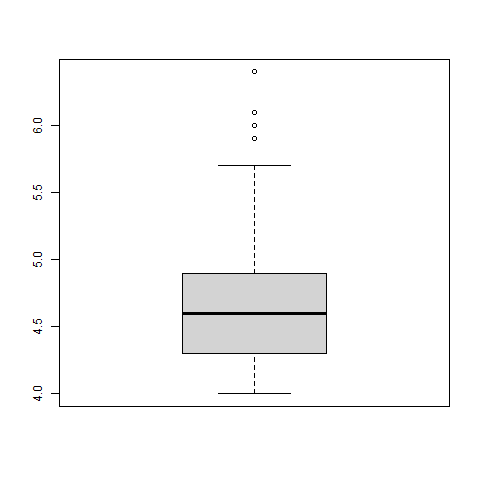

In [1]:
boxplot(quakes$mag)

-   Let's look at histogram and boxplot on top of one another, with
    a minimal customization:



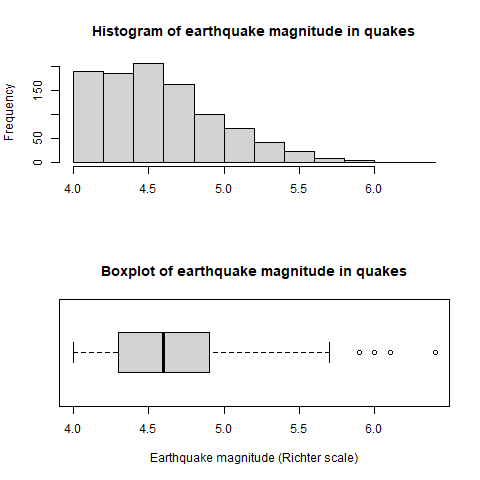

In [1]:
par(mfrow=c(2,1))
hist(quakes$mag, xlab="",
     main="Histogram of earthquake magnitude in quakes")
boxplot(quakes$mag,
        horizontal=TRUE,
        main="Boxplot of earthquake magnitude in quakes",
        xlab="Earthquake magnitude (Richter scale)")

-   Like the histogram, a boxplot shows important **global** (overall)
    features of the value distribution:
    -   centrality (where is the midpoint of the distribution?)x
    -   spread (how far are the whiskers apart, how wide is the box?)
    -   skewness (where is the box relative to the whiskers?)

-   The boxplot does not show important **local** features, like
    -   modes (multiple significant peaks or maxima)
    -   valleys (local minima)

-   Outliers are displayed explicitly (computed as 1.5 times the
    Inter-Quartile Range or IQR)

-   The `range` parameter in `boxplot` determines how far the whiskers
    should extend from the box. `range=0` includes all values.



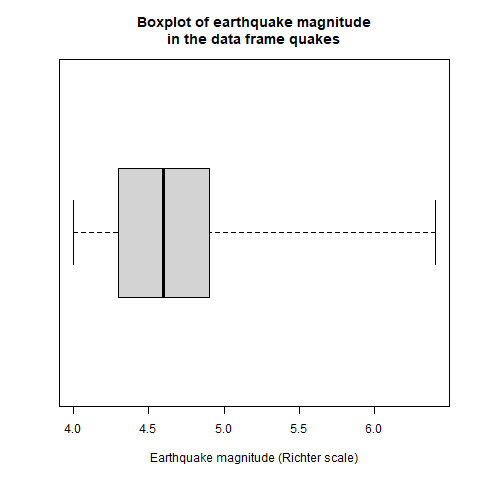

In [1]:
boxplot(quakes$mag, horizontal=TRUE,
        range=0,
        main="Boxplot of earthquake magnitude\nin the data frame quakes",
        xlab="Earthquake magnitude (Richter scale)")

## Side-by-side boxplots



-   Boxplots are useful to compare data features by plotting them
    side-by-side, e.g. for identifying how many monitoring stations
    detected each event

-   We use `cut` to create three levels of stations for three boxes:



In [1]:
stations <- cut(quakes$stations, breaks=c(0,50,100,150))
stations[1:5] # first five elements

: [1] (0,50] (0,50] (0,50] (0,50] (0,50]
  : Levels: (0,50] (50,100] (100,150]

-   The factor `stations` breaks the observations in three groups
    1.  events detected by 50 stations or fewer `(0,50]`
    2.  events detected by 51 to 100 stations `(50,100]`
    3.  events detected by between 100 and 150 stations `(100,150]`

-   The boxplot compares the distributions of the magnitudes of the
    events according to these three groups:



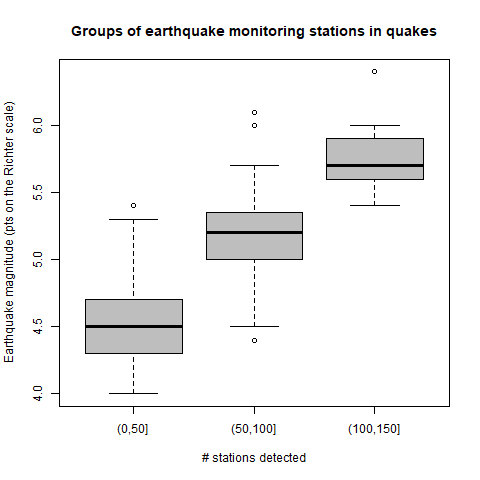

In [1]:
boxplot(quakes$mag ~ stations,
        main="Groups of earthquake monitoring stations in quakes",
        xlab="# stations detected",
        ylab="Earthquake magnitude (pts on the Richter scale)",
        col="gray")

-   You can see that the higher the recorded magnitude, the more
    stations detected the given seismic event

-   In the argument, we've used the *formula* `y ~ x` ("y vs. x") with
    `x=stations` and `y=quakes$mag`. If the `y ~` is missing, the argument is
    taken as `x` (cp. `help(boxplot)`).



## Scatterplots



-   Scatterplots are used to identify relationships between the observed
    values of two different numeric-continuous variables x,y

-   The scatterplot is displayed as an x-y-coordinate plot but not every
    x-y-plot shows relationships of interest - e.g. a plot of the
    latitude vs. longitude in `quakes`:



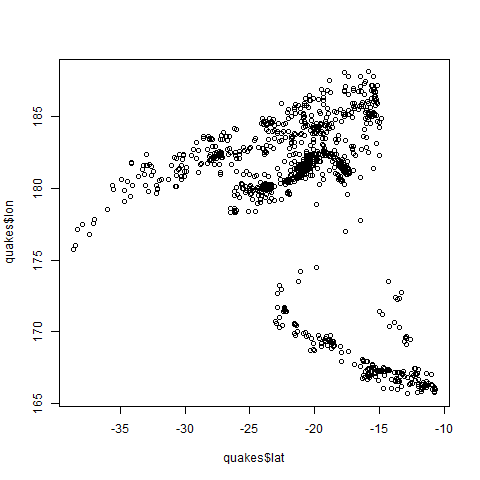

In [1]:
plot(x=quakes$lat,
     y=quakes$lon)

-   A real scatterplot is the visualization of the mileage (`mpg`)
    vs. weight (`wt`) of cars in the built-in `mtcars` data set:



In [1]:
plot(mtcars$mpg ~ mtcars$wt)
title("Car mileage (mpg) vs. weight (wt) in mtcars")

## Scatterplots of more than two variables



-   The famous `iris` dataset, collected in the mid-1930s, contains petal
    and sepal measurements for three species of perennial iris flowers,
    *Iris setosa*, *Iris virginica*, and *Iris versicolor* (Fisher, 1936).
    
    ![img](../img/iris.png)

-   View the first few records:



In [1]:
head(iris[1:5])

:   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
  : 1          5.1         3.5          1.4         0.2  setosa
  : 2          4.9         3.0          1.4         0.2  setosa
  : 3          4.7         3.2          1.3         0.2  setosa
  : 4          4.6         3.1          1.5         0.2  setosa
  : 5          5.0         3.6          1.4         0.2  setosa
  : 6          5.4         3.9          1.7         0.4  setosa

-   To plot every variable against every other, you can plot an array of
    x-y-plots:
    -   Each column has the shown variable as x- and the others as y-axis
    -   Each row has the shown variable as y- and the others as x-axis
    -   E.g. the square (2,1) shows x = `Sepal.Length`, y = all others



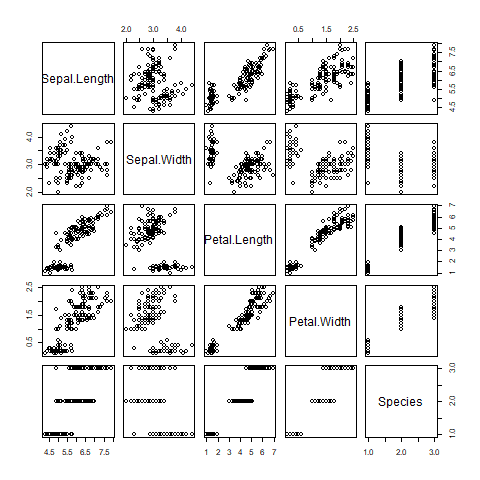

In [1]:
plot(iris)

-   The array is much easier to read when adding the iris species as a
    sixth variable to the plot.



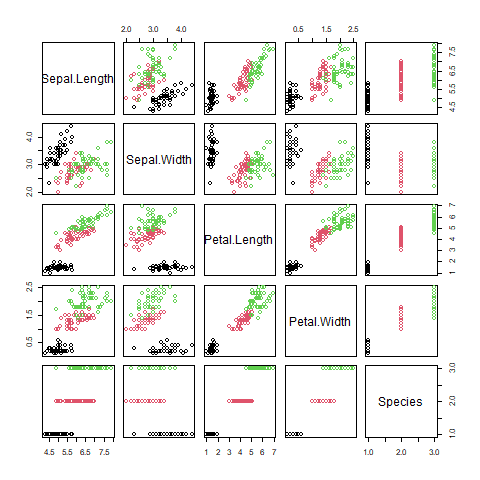

In [1]:
plot(iris, col=iris$Species)

-   Homing in on one of the diagrams, e.g. `Sepal.Width` vs. `Sepal.Length`:



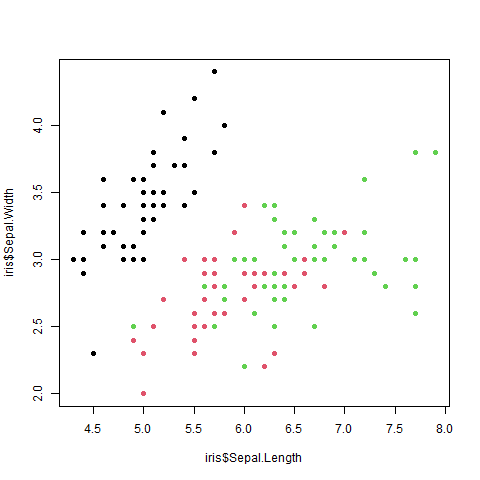

In [1]:
plot(
  iris$Sepal.Width ~ iris$Sepal.Length,
  col=iris$Species,
  pch=19)

-   As an example for a fully customized plot with legend:



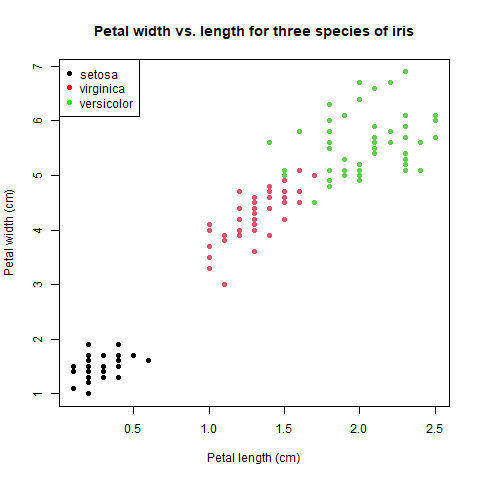

In [1]:
plot(
  y=iris$Petal.Length, xlab="Petal length (cm)",
  x=iris$Petal.Width, ylab="Petal width (cm)",
  col=iris$Species, 
  pch=19)
legend("topleft",
       legend=c("setosa", "virginica","versicolor"),
       col=c("black","red","green"), pch=19)
title("Petal width vs. length for three species of iris")

## 10 piccolo problems



1.  Create a histogram of the horsepower data of the 32 cars in the
    `mtcars` data set. Run the code.



1.  Label the x-axis. Run the code.



1.  Label the y-axis. Run the code.



1.  Title the plot. Run the code.



1.  Print the binwidth.



1.  Plot the logarithm of hp to base 10.



1.  Plot only the car count for cars with a horsepower of greater or
    equal `sub = 220 hp`.



1.  Change the x-axis label so that it automatically shows `sub`.



1.  Put the log10 plot and the original plot in one plot array (on top
    of one another) - without any customization.



1.  Put the log10 plot and the original plot in one plot array (side by
    side) - without any customization.

